This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Clutter detection using the Gabella approach

In [1]:
import matplotlib.pyplot as pl
import numpy as np
import wradlib.vis as vis
import wradlib.clutter as clutter
import wradlib.util as util
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

/home/runner/micromamba-root/envs/wradlib-notebooks/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read the data

In [2]:
filename = util.get_wradlib_data_file("misc/polar_dBZ_fbg.gz")
data = np.loadtxt(filename)

### Apply filter

In [3]:
clmap = clutter.filter_gabella(data, wsize=5, thrsnorain=0.0, tr1=6.0, n_p=8, tr2=1.3)

### Plot results

Text(0.5, 1.0, 'Cluttermap')

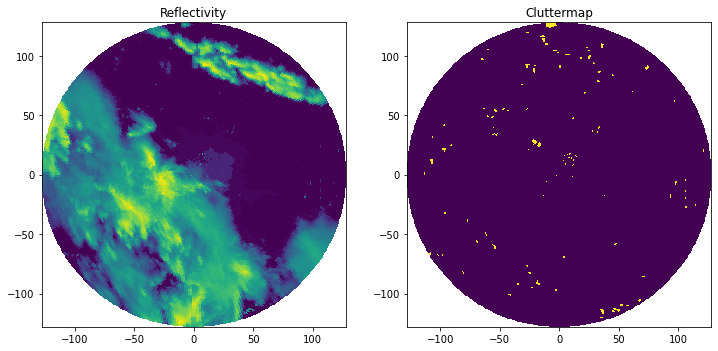

In [4]:
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(121)
ax, pm = vis.plot_ppi(data, ax=ax)
ax.set_title("Reflectivity")
ax = fig.add_subplot(122)
ax, pm = vis.plot_ppi(clmap, ax=ax)
ax.set_title("Cluttermap")